# Feedback Distributed Data-Gathering & Symmetries

## Problem 1: Feedback Distributed Data-Gathering

In [ ]:
from typing import List, Dict, Tuple, Union

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import matplotlib as mpl

from arch.Architecture import Architecture

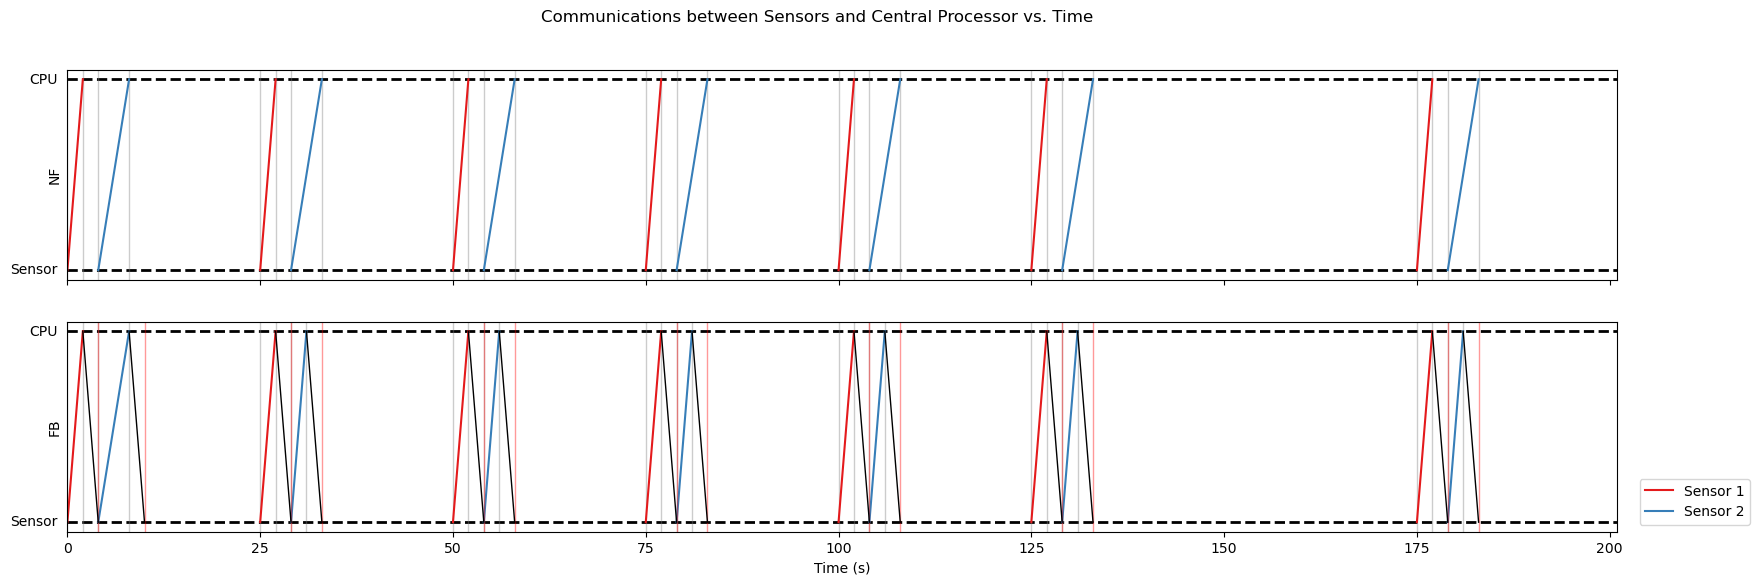

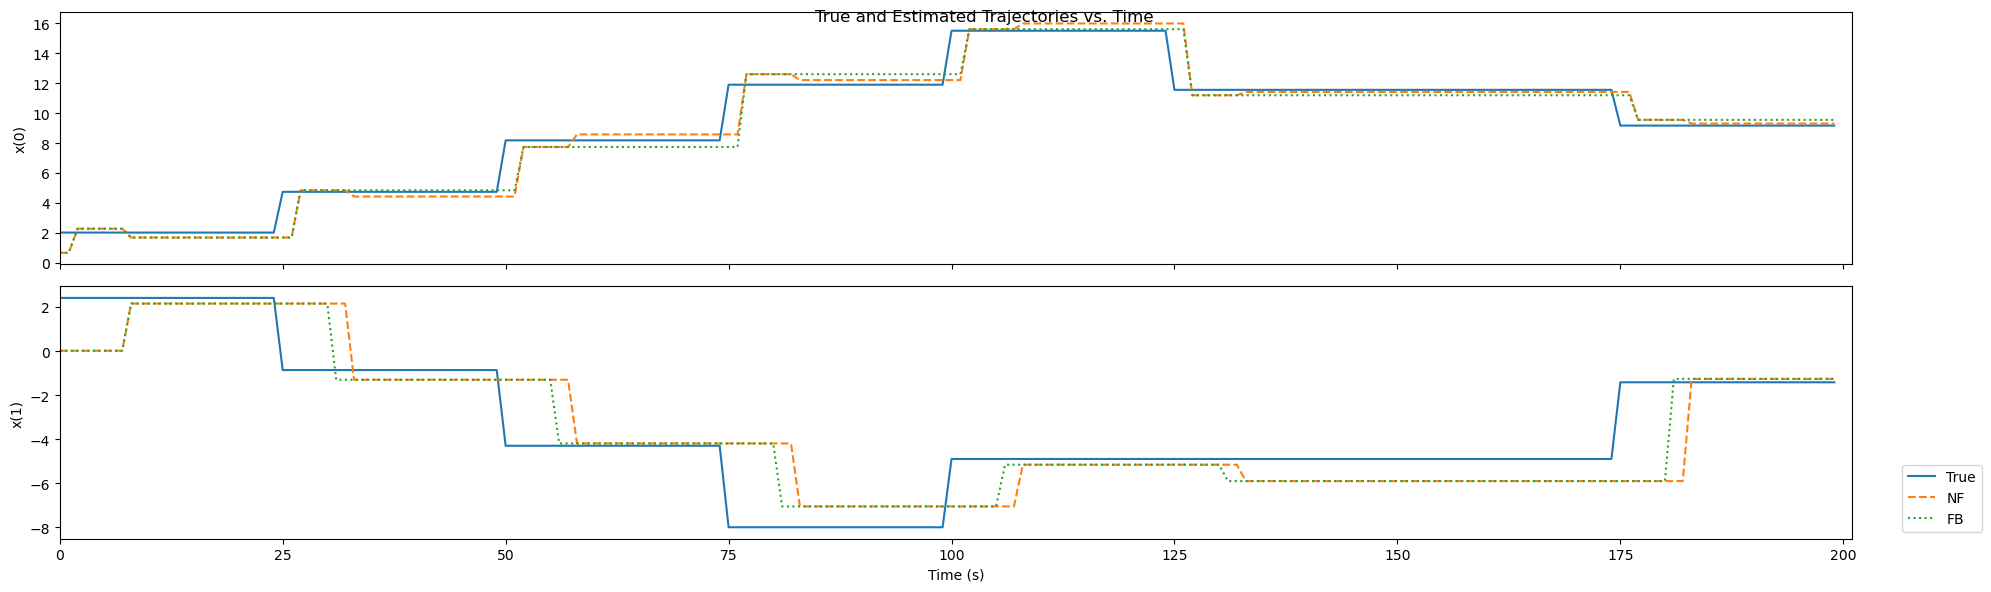

Metrics		MSE		Power Expenditure
NF:		3.6648		1.75
FB:		3.1240		1.69


In [ ]:
n = 2
x0 = np.random.uniform(-2,2,size=n)
arch = Architecture(x0=x0,pb=1, epsilon=0.8,n=n)
arch.simulate(arch.Tsim)

arch.plot()
_ = arch.calculate_performance_metrics(print_metircs=True)



### c) Monte-Carlo trials

In [248]:
def monte_carlo_trials(n_trials: int = 50,n: int = 2, del_T: float = 25.0, d: List[float] = [2.0, 4.0], p: float = 0.8, Tsim: int = 200,
                    M: int = 2, m: List[List[int]] = [[0], [0, 1]], tau: List[float] = [5.0, 5.0], b: List[float] = [0, 4.0],
                    H: List[int] = [1, 1], omega_sq: float = 0.2, epsilon: float = 0.8, P: List[float] = [5.0, 3.0],
                    t_d: List[float] = [2.0, 1.0], pb: float = 1, Hc: int = 1, print_metrics: bool = False) -> Tuple[float, float, float, float]:
    """
    Perform Monte Carlo trials to assess the performance of the architecture.

    Parameters:
    - n_trials (int): Number of Monte Carlo trials (default: 50).
    - n (int): State dimension (default: 2).
    - del_T (float): Environment period (∆t ∈ ℝ⁺, default: 25.0).
    - d (List[float]): Step-size bounds [d_lower, d_upper] (default: [2.0, 4.0]).
    - p (float): Non-zero step-size probability p (default: 0.8).
    - Tsim (int): Simulation duration Tsim ∈ ℝ⁺ (default: 200).
    - M (int): Number of sensors (default: 2).
    - m (List[List[int]]): List of sensor indices for measurements (default: [[0], [0, 1]]).
    - tau (List[float]): Sampling periods for each sensor (default: [5.0, 5.0]).
    - b (List[float]): Sensor offsets (default: [0, 4.0]).
    - H (List[int]): Memory table sizes for each sensor (default: [1, 1]).
    - omega_sq (float): Sensor white noise variance (default: 0.2).
    - epsilon (float): Triggering rule threshold value (default: 0.8).
    - P (List[float]): Power expenditure costs incurred by sensor j (default: [5.0, 3.0]).
    - t_d (List[float]): Communication delays [uplink, downlink] (default: [2.0, 1.0]).
    - pb (float): Broadcast probability (default: 1).
    - Hc (int): Central processor memory table size (default: 1).
    - print_metrics (bool): Flag to print metrics (default: False).

    Returns:
    - Tuple[float, float, float, float]: Average MSE NF, Average MSE FB, Average Power NF, Average Power FB.
    """
    
    a_mse_nf=0
    a_mse_fb= 0 
    a_power_nf=0
    a_power_fb=0

    for _ in range(n_trials):
        x0 = np.random.uniform(-2,2,size=n)
        arch = Architecture(x0=x0,n=n, del_T=del_T, d=d, p=p, Tsim=Tsim, M=M, m=m, tau=tau, b=b, H=H, 
                            omega_sq=omega_sq, epsilon=epsilon, P=P, t_d=t_d, pb=pb, Hc=Hc)
        arch.simulate(arch.Tsim)
        mse_nf, mse_fb, power_nf, power_fb = arch.calculate_performance_metrics()
        a_mse_nf+=mse_nf
        a_mse_fb+=mse_fb
        a_power_fb+=power_fb
        a_power_nf+=power_nf

    a_mse_nf, a_power_nf = a_mse_nf/n_trials, a_power_nf/n_trials
    a_mse_fb, a_power_fb = a_mse_fb/n_trials, a_power_fb/n_trials
    if (print_metrics):
        print("Metrics\t\tMSE\t\tPower Expenditure")
        print("NF:\t\t{:.4f}\t\t{:.4f}".format(a_mse_nf, a_power_nf))
        print("FB:\t\t{:.4f}\t\t{:.4f}".format(a_mse_fb, a_power_fb))
    return  a_mse_nf, a_mse_fb, a_power_nf, a_power_fb

_ = monte_carlo_trials(n_trials=50, print_metrics=True)


Metrics		MSE		Power Expenditure
NF:		3.6568		1.5770
FB:		3.2734		1.7434


The FB framework had lower MSE but higher Power Expenditure due to cpu broadcasts, compared to NF. 

### d) epsilon trade-off plot

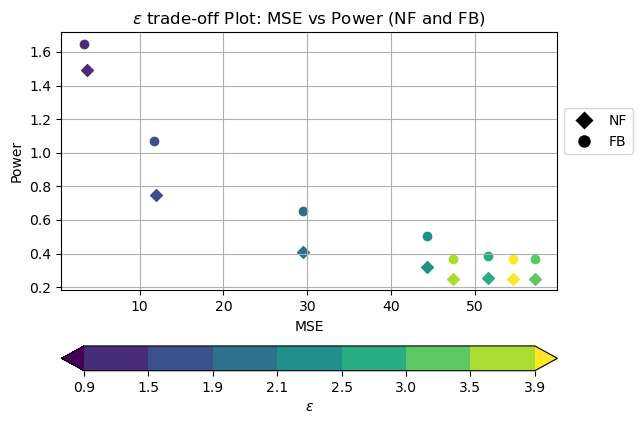

In [249]:

def trade_off_plot(var_name, values, print_literal, other_parameters) -> None:
    """
    Generate a trade-off plot between MSE and Power for NF and FB scenarios across different variable values.

    Parameters:
    - var_name (str): Name of the variable to vary.
    - values (List): List of values for the variable.
    - print_literal (str): String literal for printing labels.
    - other_parameters (dict): Dictionary containing other fixed parameters for the Architecture and Monte Carlo.

    Returns:
    - None
    """

    fig, ax = plt.subplots()

    # Store legend handles for NF and FB separately
    nf_handles = []
    fb_handles = []

    # Get the 'viridis' colormap with custom bounds
    cmap = mpl.cm.viridis
    bounds = values
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

    for i, value in enumerate(values):
        a_mse_nf, a_mse_fb, a_power_nf, a_power_fb = monte_carlo_trials(**{var_name: value}, **other_parameters)
        value_color = cmap(norm(value))
        # Plotting MSE vs Power for NF
        nf_handle = ax.scatter(a_mse_nf, a_power_nf, marker='D', color=value_color, label=f'NF {print_literal} {value}')
        nf_handles.append(nf_handle)
        
        # Plotting MSE vs Power for FB
        fb_handle = ax.scatter(a_mse_fb, a_power_fb, marker='o', color=value_color, label=f'FB {print_literal} {value}')
        fb_handles.append(fb_handle)

    # Set labels and title
    ax.set_xlabel('MSE')
    ax.set_ylabel('Power')
    ax.set_title(f'{print_literal} trade-off Plot: MSE vs Power (NF and FB)')

    # Create custom legend handles for NF and FB
    custom_nf_legend = mlines.Line2D([], [], marker='D', color='w', label='NF', markerfacecolor='black', markersize=10)
    custom_fb_legend = mlines.Line2D([], [], marker='o', color='w', label='FB', markerfacecolor='black', markersize=10)

    # Add NF and FB legends to the plot
    ax.legend(handles=[custom_nf_legend, custom_fb_legend], loc='lower left', bbox_to_anchor=(1, 0.5))

    # Create colorbar using 'viridis' colormap with custom bounds
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal')
    cbar.set_label(f'{print_literal}')
    cbar.set_ticks(values)

    ax.grid(True)


epsilons = [0.9, 1.5, 1.9, 2.1, 2.5, 3.0, 3.5, 3.9]
other_params = {"n_trials": 50}
trade_off_plot(var_name="epsilon",values=epsilons, print_literal="$\epsilon$", other_parameters=other_params )


Increasing the $\epsilon$, tends to result in NF and FB having similar MSE; while decreasing the $\epsilon$ tends to result in FB have lower MSE than NF. For all $\epsilon$ used, the FB power expenditure is always higher, but by extrapolating we can see that as $\epsilon \to 0$ the NF will perform better, i.e. lower MSE and Power.  

This makes sense, as lowering the threshold means that the estimate of cpu's state will be better and hence the overall number of broadcasts made will be lower, as it can be seen in the part b graph. The snesors are broadcasting less bits to the cpu, hence decreasing overall expenditure. 

### e) Broadcast probability tradeoff plot

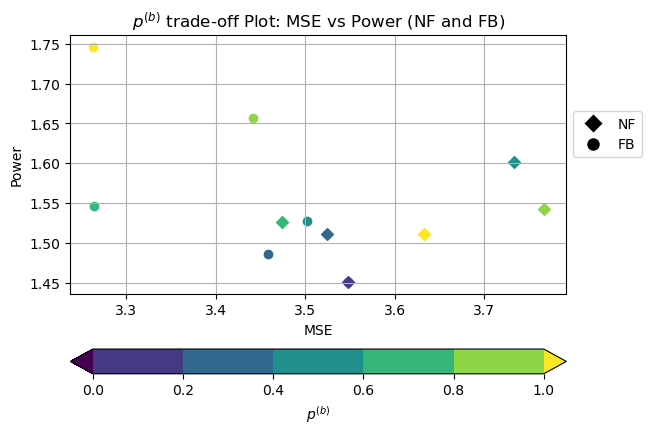

In [259]:
pbs = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
other_params = {"n_trials": 50, "epsilon": 0.8}
trade_off_plot(var_name="pb",values=pbs, print_literal="$p^{(b)}$", other_parameters=other_params )

Interestingly, increasing the $p^{(b)}$ have opposite effects on NF and FB. We observe that, NF archtiecture tends to have higher MSE for higher $p^{(b)}$, while FB architecture tends to have lower MSE for higher $p^{(b)}$. Both converge to similar region when $p^{(b)} \approx 0.5$. The power expindeture follows similar pattern for both with increasing $p^{(b)}$ leads to increasing power for FB and NF. 

We can say that FB performs better when $p^{(b)}>0.5$, with lower MSE and similar power expenditure. The $p^{(b)} =1$ having the min MSE but highest power expenditure for FB.

### f) Simulating the architecture in higher dimension

In a larger-dimensional environment, we see that MSE for both FB and NF tends to be similar as the current broadcast and trigger rules do not take advantage of multiple readings to reduce noise. We do see that when a component is observed by multiple sensors, the predicted trajectory closely follows the actual trajectory. Increasing the number of sensors will definitely improve the MSE but the totla power expenditure will naturally be higher. 

The $\epsilon$ trade-off plot show a similar behaviour to before, with low $\epsilon$ resulting in lower MSE but higher power expenditure. The power expenditure rises exponentially with low  $\epsilon$, and NF performing much better than feedback in all cases. NF and FB have same MSE but FB has higher power expenditure for all $\epsilon$. 

The $p^{(b)}$ trade-off plot is slightly different. The FB case is still the same, with high $p^{(b)}$ leading to lower MSE but high power expenditure. However, the NF case behaves slightly differently with higher $p^{(b)}$ tends to lead to lower MSE and power on average. This behaviour needs to be studied more with larger number of monte-carlo trials. 

The broadcast rule should also be a function of delay times, and prioritise the sensors with hgih sampling period to update the when needed. This will minimise the number of bits broadcasted, hence leading to shorter broadcast time and faster updates. We should also keep in mind that multiple sensors may observe the same component, so with a little smarter broadcast rule which keeps track expected time of next transmission from a sensor we can minimise sending updates to sensors who will be sampling the environment soon. 

If possible, we cna also set offsets of the sensors in a way such that, sensors who observes the most components have shortest $b_j$ this will also prevent other sensors form transmitting some already observed bits broadcasted by cpu. 

Metrics		MSE		Power Expenditure
NF:		79.1395		55.0
FB:		79.1395		149.245


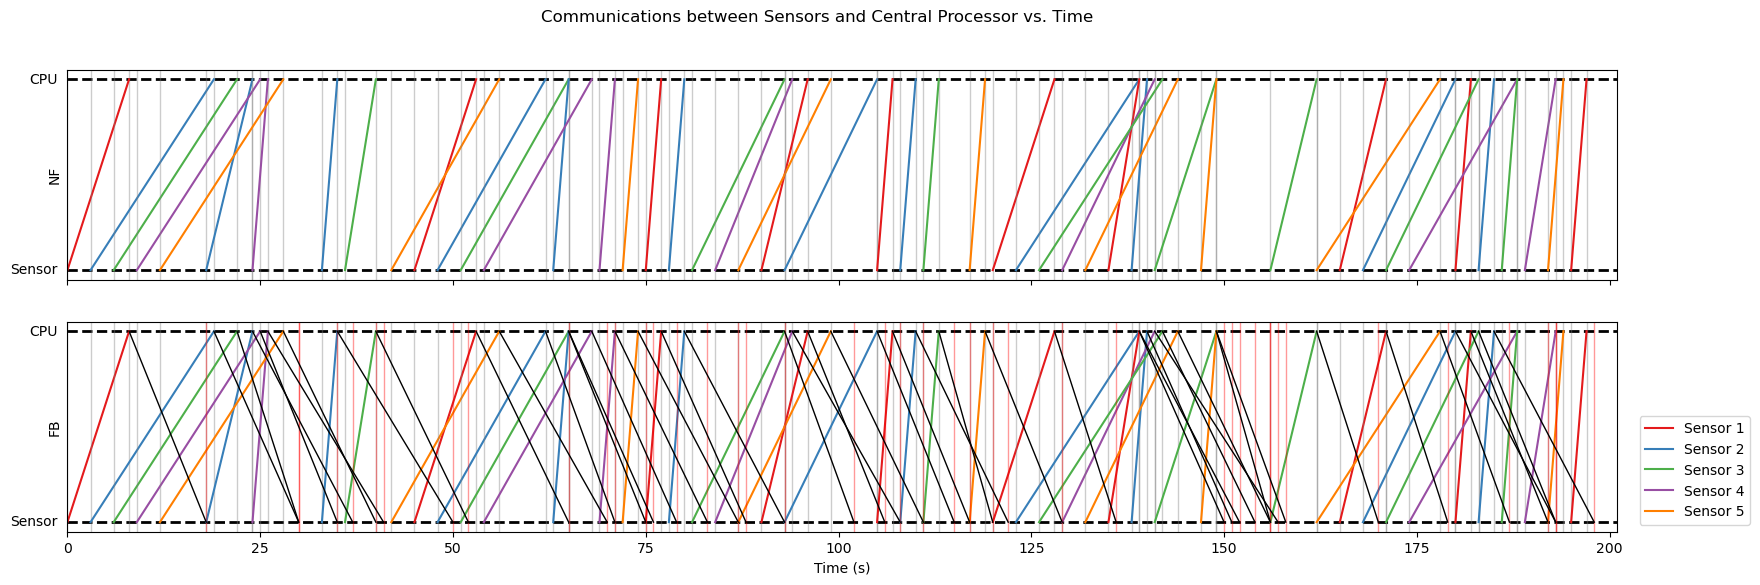

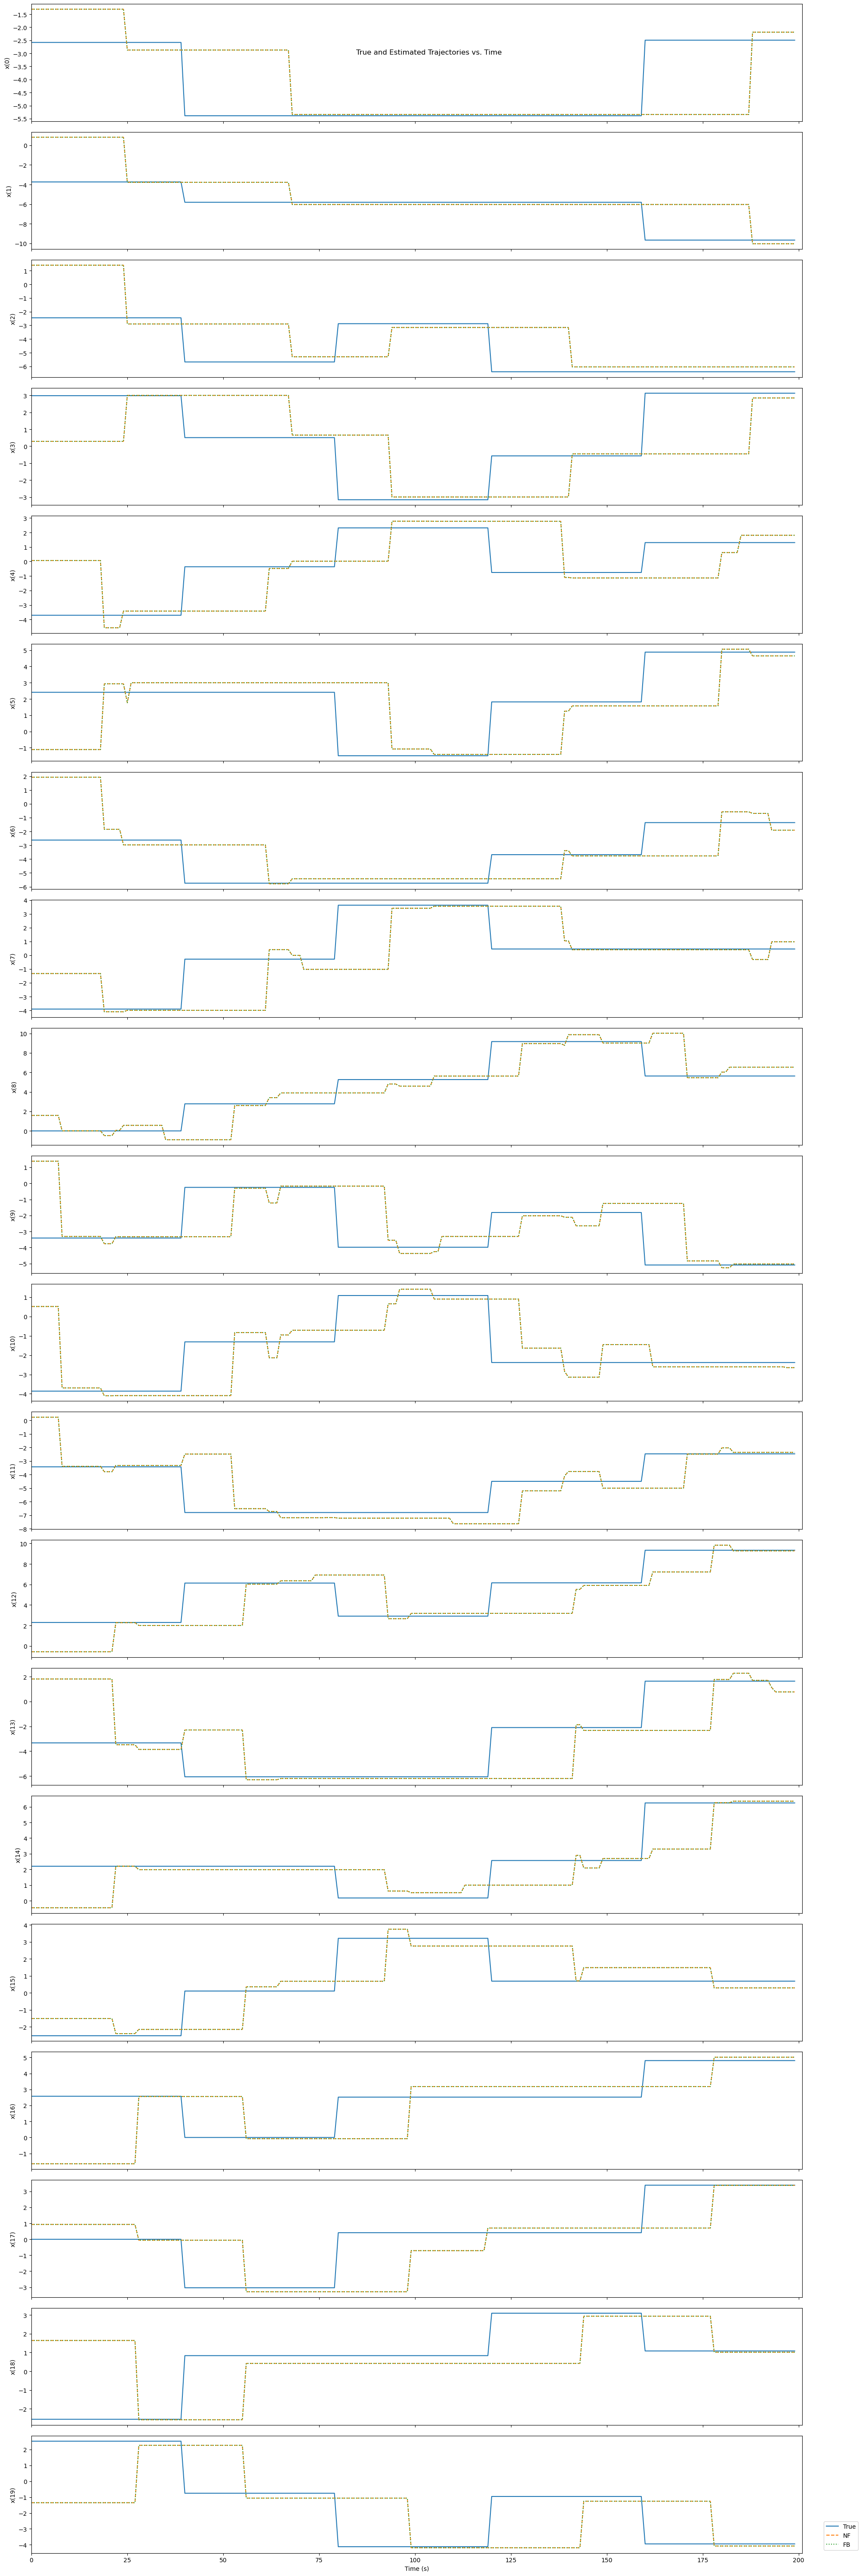

In [265]:
n = 20
M = 5
x0 = np.random.uniform(-2,2,size=n)

arch_params = {"n": n, "del_T": 40.0, "M": M, "tau": [15]*M, "b": [0, 3, 6, 9, 12], "H": [1]*M,
          "m": [list(range(8,12)),list(range(4,12)), list(range(8,16)), list(range(0,8)), list(range(12,20))]}


arch = Architecture(x0=x0, pb=0.6, epsilon=0.5, **arch_params)
arch.simulate(arch.Tsim)
_ = arch.calculate_performance_metrics(print_metircs=True)
arch.plot()


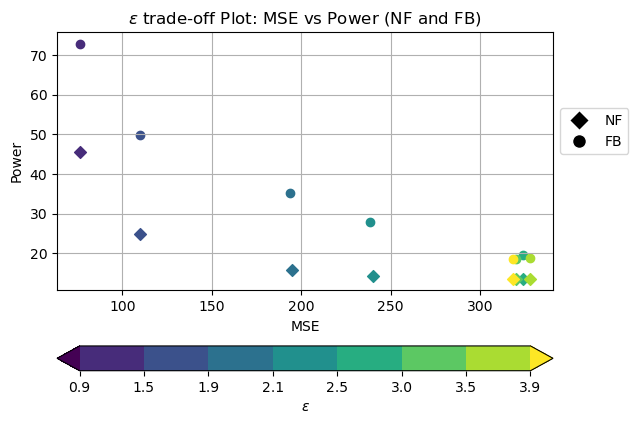

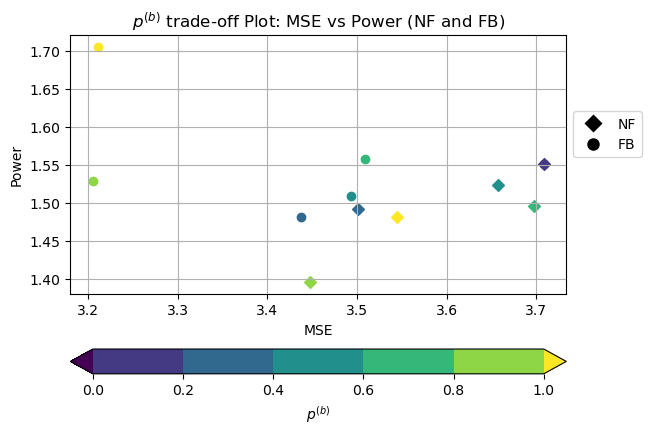

In [260]:
epsilons = [0.9, 1.5, 1.9, 2.1, 2.5, 3.0, 3.5, 3.9]
pbs = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
monte_carlo_params = {"n_trials": 50, "pb": 0.4}
plot_param = {**arch_params, **monte_carlo_params}
trade_off_plot(var_name="epsilon",values=epsilons, print_literal="$\epsilon$", other_parameters=plot_param )
monte_carlo_params = {"n_trials": 50, "epsilon": 0.8}
plot_param = {**arch_params, **monte_carlo_params}
trade_off_plot(var_name="pb",values=pbs, print_literal="$p^{(b)}$", other_parameters=other_params )

### g) Optimum Strategy and Improvements

The optimum strategy in the FB architecture is an $\epsilon$ close to 1, and $p^{(b)}$ close to 0.75 (mid of 0.5-1). This is to ensure low MSE while keeping the power expenditure low. As we saw earlier, increasing $p^{(b)}$ to 1, leads to very high $p^{(b)}$. Therefore $p^{(b)}$  somewhere close to center of (0.5, 1) would minimise power while keeping the MSE low. It's worth noting that there is not much decrease in MSE as we decrease $p^{(b)}$. Similarly, we want lost $\epsilon$.  

There are many parameters which can be modified to further optimise our strategy. As discussed above, having a structured offsets, with multiple sensors observing as many components of the environment would be desirable. Or if the environment is structured, like a video feed in real life, we can interpolate $\hat{x}$ and have a better estimate of the states even without frequent updates from all sensors. So a net like structure could be set out, where sensors observe every other or k-other component, with some sensors observe only 1 or 2 cruicial compoenents which may require most attention. This way, both MSE and power expenditure would be low. 

In the case where no such structure is present, that is sensors may be observing different regions or environments with some compenent overlap (some sensors in same region). We can have different epsilon thresholds for different sensors, giving flexibility and also introducing measure of importance of some components compared to others. This approach allows to account for sensors with different noise distribution. 

While having more sensors may appear to be a good idea, as it usually leads to better tracking of the signal; there will always be redundent information present or some sensors may never transmit. This usually leads to waste of resources. So, finding an optimal number of sensors required for a component to low MSE and power expenditure should also be studied. This constraint, may be dependednt on the environment being studied and different snesor configurations would be optimal for different environemtns. 

Having a little memory table in sensors in cpu would be better, and make the sensors and cpu able to handle more complex interpolation or filtering techniues to account for noise and better tracking of true state components. 

## Problem 2: Rotation Symmetry in Higher Dimensions


The lagrangian, $L \triangleq \frac{1}{2} \parallel q\parallel_3^{2} -V(\parallel q \parallel_3)$

The 3d rotation matrix $R = R_{\alpha}R_{\beta}R_{\gamma} = \begin{bmatrix}
\cos(\alpha) & -\sin(\alpha) & 0\\
\sin(\alpha) &\cos(\alpha) & 0\\
0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
\cos(\beta) &0 &\sin(\beta) \\
0 &1 & 0\\
-\sin(\beta) & 0 & \cos(\beta)
\end{bmatrix} \begin{bmatrix}
1 &0 &0 \\
0 &\cos(\gamma) & -\sin(\gamma)\\
0 & \sin(\gamma) & \cos(\gamma)
\end{bmatrix} 
$

We see that \parallel R\parallel = 1. 

Let $\tilde{q} = Rq$ and we see that $\parallel \tilde{q}\parallel =  \parallel R\parallel \parallel q\parallel = \parallel q\parallel$, so the magnitude is same after rotation. (We just rotate the point while mainting the radius).

Similarly, $\dot{\tilde{q}} = R\dot{q}$ and we see that $\parallel \dot{\tilde{q}}\parallel =  \parallel R\parallel \parallel \dot{q}\parallel = \parallel \dot{q}\parallel$

Therfore, $\tilde{L} \equiv L$

For small angle approximation, $R = \begin{bmatrix}
1 & \alpha\beta-\gamma & \beta-\alpha\gamma\\
\gamma &\alpha\beta\gamma +1 & \beta\gamma-\alpha\\
\beta & \alpha & 1
\end{bmatrix}$

Then, 

\begin{align*}
\tilde{x} &= x + (\alpha\beta-\gamma)y + (\beta -\alpha\gamma)z\\
\tilde{y} &= \gamma x + (\alpha\beta\gamma+1)y+(\beta\gamma-\alpha)z\\
\tilde{z} &= -\beta x +\alpha y +z
\end{align*}

\begin{align*}
\dot{\tilde{x}} &=\dot{x} + (\alpha\beta-\gamma)\dot{y} + (\beta -\alpha\gamma)\dot{z} + (\dot{\alpha}\beta + \dot{\beta}\alpha-\dot{\gamma})y+(\dot{\beta}-\dot{\alpha}\gamma -\alpha\dot{\gamma})z\\
\dot{\tilde{y}} &= \gamma \dot{x} + (\alpha\beta\gamma+1)\dot{y}+(\beta\gamma-\alpha)\dot{z} + \dot{\gamma}x + (\dot{\alpha}\beta\gamma +\alpha\dot{\beta}\gamma + \alpha\beta\dot{\gamma})y+(\dot{\beta}\gamma + \beta\dot{\gamma}-\dot{\alpha})z\\
\dot{\tilde{z}} &= -\beta\dot{x} +\alpha \dot{y} +\dot{z} -\dot{\beta}x +\dot{\alpha}y
\end{align*}

\begin{align*}
\delta A &= \int_{t_1}^{t_2} (\tilde{L}-L)dt = 0 &\\
&\approx \int_{t_1}^{t_2} \frac{1}{2} m \left[ \parallel\dot{\tilde{q}}\parallel^2 -\parallel \dot{q} \parallel^2 \right]dt & \\
&= \int_{t_1}^{t_2} \frac{1}{2} m \sum_{i=1}^{3}\left[\left(\sum_{j=1}^{3} R_{i,j}\dot{q}_{j} + \dot{R}_{i,j}q_j\right)^2 -q_i^{2}\right]dt & \\
& = -m\left. \left(\sum_{i=1}^{3}(R_i (q \times \dot{q}))\right)\right|_{t_1}^{t_2} - m\int_{t_1}^{t_2} \sum_{i=1}^{3} R_i \frac{d}{dt}(q \times \dot{q}) dt &\text{   (by IBP and definitions of cross products)} \\
& = - m\int_{t_1}^{t_2} \sum_{i=1}^{3} R_i \frac{d}{dt}(q \times \dot{q}) dt &\text{   ($R_{i,j} = 0$ at $t_1,t_2$  by definition)}
\end{align*}

Therefore we get that $\frac{d}{dt}(m(q \times \dot{q})) =0$, i.e. the angular momentu is conserved. 


## Problem 3: Noether's Theorem: Time-Translation Symmetry

### a) Lagrangian Formulation
#### i) Taylor expansion to approximate $\tilde{q_i}$

\begin{align*}
\tilde{q_i} &\triangleq q_i(t+\epsilon(t))\\
&=q_i(t) + \epsilon(t)\dot{q_i}(t)\\
\dot{\tilde{q_i}} &= \dot{q_i}(t)+\dot{\epsilon}(t) \dot{q_i}(t)+\epsilon(t) \ddot{q_i}(t)
\end{align*}

#### ii) POLA and conservation of energy

Apply first order Taylor expansion to $\tilde{L}$
i.e. $f(x+\Delta x, y+\Delta y) = f(x,y)+ \Delta x \dfrac{\partial f}{\partial x}+\Delta y \dfrac{\partial f}{\partial y}$

\begin{align*}
\tilde{L} &\triangleq L(\tilde{q_i}(t),\dot{\tilde{q_i}}(t))\\
&\approx L +  \sum_{i=1}^{N}\epsilon \dot{q_i}\frac{\partial L}{\partial q_i} + \sum_{i=1}^{N}(\dot{\epsilon}(t) \dot{q_i}(t)+\epsilon(t) \ddot{q_i}(t))\frac{\partial L}{\partial \dot{q_i}} \\
& = L + \epsilon \dot{L} + \sum_{i=1}^{N}(\dot{\epsilon}(t) \dot{q_i}(t))\frac{\partial L}{\partial \dot{q_i}} 
\end{align*}

POLA: $\delta \mathcal{S} = 0$ and $\epsilon(t_1)=\epsilon(t_2)=0$

\begin{align*}
&\text{POLA: }&\delta \mathcal{S} &= \int_{t_1}^{t_2} (\tilde{L} - L) dt  &= 0\\
&             &                  &= \int_{t_1}^{t_2} (\epsilon \dot{L}+ \sum_{i=1}^{N}(\dot{\epsilon}(t) \dot{q_i}(t))\frac{\partial L}{\partial \dot{q_i}} ) dt &= 0\\
& & &= \int_{t_1}^{t_2} \epsilon \dot{L}dt + \int_{t_1}^{t_2}(\sum_{i=1}^{N}(\dot{\epsilon}(t) \dot{q_i}(t))\frac{\partial L}{\partial \dot{q_i}} ) dt &= 0\\ 
&\text{IBP: }&\int_{t_1}^{t_2}(\dot{\epsilon}(t) \sum_{i=1}^{N}\dot{q_i}(t)\frac{\partial L}{\partial \dot{q_i}} ) dt &= \sum_{i=1}^{N}\dot{q_i}\frac{\partial L}{\partial \dot{q_i}}\int_{t_1}^{t_2}\epsilon(t)dt - \int_{t_1}^{t_2} \left(\frac{d}{dt}\left( \sum_{i=1}^{N}\dot{q_i}\frac{\partial L}{\partial \dot{q_i}}\right)\int \dot{\epsilon}(t) dt \right) dt \\
&&&= -\int_{t_1}^{t_2} \epsilon(t) \frac{d}{dt}\left(\sum_{i=1}^{N} \dot{q_i}\frac{\partial L}{\partial \dot{q_i}}\right)dt \\

&\text{Combining POLA and IBP gives: }&\delta \mathcal{S} &= \int_{t_1}^{t_2} \epsilon(t) \frac{d}{dt}\left( L - \sum_{i=1}^{N} \dot{q_i}\frac{\partial L}{\partial \dot{q_i}}\right)dt &0\\
&\implies &\epsilon(t)=0 \text{ trivial solution, so } &\frac{d}{dt}\left( L - \sum_{i=1}^{N} \dot{q_i}\frac{\partial L}{\partial \dot{q_i}}\right)=0 \\
&&&\text{ i.e.} \frac{\partial}{\partial t}(T.E.) =0 \text{, Therefore, Total energy is conserved}
\end{align*}




### b) Time dependent Lagrangian
Consider the case where a time dependent external force may be applied to a system, as a form of friction  or other forces.
$L(t,q,\dot{q}) = K-V+qF_{ext}$ and let $\tilde{L} = T-V$ be the system without the external force. and $\tilde{E} = K+V$ be total energy of this system which is constant over time. 

As we know, Total Energy $E = L - \sum_{i=1}^{N} \dot{q_i}\frac{\partial L}{\partial \dot{q_i}} = K + V + qF_{ext}(t) = \tilde{E} + qF_{ext}(t)$. 
Then we observe that $\frac{\partial E}{\partial t} = \dot{q}F_{ext}(t) + q\dot{F_{ext}}(t) \neq 0. So the POLA integral wont be zero if the external force is not conservative. And we see that total energy of the system is also time dependent. 

### c) Hamiltonian Formulation

#### i) Action integral with Hamiltonian $\mathcal{H}(p,q) = <p, \dot{q}> - L(q,\dot{q})$

$\mathcal{S} \triangleq \int_{0}^{T} L(q,\dot{q}) dt = \int_{0}^{T} <p, \dot{q}> - \mathcal{H}(p,q)  \text{ }dt$

#### ii) Taylor expansion of q(t), p(t)

\begin{align*}
\tilde{q}(t) = q(t+\epsilon(t)) \approx q(t) + \epsilon(t)\dot{q}(t)\\
\tilde{p}(t) = p(t+\epsilon(t)) \approx p(t) + \epsilon(t)\dot{p}(t)
\end{align*}

#### iii) Prove total energy is conserved by POLA

Writting $g(t) =<p, \dot{q}> - \mathcal{H}(p,q)$ and 
$\tilde{g}(t) = g + \epsilon \dot{g} + \sum_{i=1}^{N} \left(\epsilon \ddot{q_i} + \dot{\epsilon}\dot{q_i}\right)\frac{\partial g}{\partial \dot{q_i}}$

POLA:
\begin{align*}
\delta \mathcal{S} &\triangleq \int_{0}^{T} \tilde{g} - g \text{ }dt=0\\
\text{ }  &= \int_{0}^{T} \left(\epsilon \dot{g} + \sum_{i=1}^{N}(\epsilon \ddot{q_i} + \dot{\epsilon}\dot{q_i})\frac{\partial g}{\partial \dot{q_i}} \right) dt\\
\text{(Using Using Hamiltons eqaution of motion) } &= \int_{0}^{T} \left[ \epsilon(t) \left\{\sum_{i=1}^{N} \dot{p_i}(\dot{q_i} - \partial_{p_i}H) + \dot{q_i}(-\partial_{q_i}H(p,q))\right\} + \sum_{i=1}^{N}(\epsilon \ddot{q_i} + \dot{\epsilon}\dot{q_i})p_i \right]dt \\
& = \int_{0}^{T} \left[ \epsilon(t)\left\{ \sum_{i=1}^{N} \left(\dot{q_i}(-\partial_{q_i}H) + \ddot{q_i}p_i \right)\right\} +\dot{\epsilon}(t) \sum_{i=1}^{N} \dot{q_i}{p_i} \right]dt\\
\text{(Using IBP and Hamilton's eqn of motions) } &= \int_{0}^{T} \left[ \epsilon(t)\left( \sum_{i=1}^{N} -\dot{q_i}(\partial_{q_i}H + \dot{p_i})\right) \right]dt\\
(\partial_{q_i}H + \dot{p_i}= 0 \text{ by Hamiltons equations})&\implies \delta \mathcal{S}=0, \therefore \text{total energy must be conserved}
\end{align*} 

